In [9]:
# 在sklearn的内置数据集上测试logistic模型
from sklearn.datasets import make_classification as MC # 数据集导入
from sklearn.model_selection import train_test_split, cross_val_score # 样本切分和交叉验证
from sklearn.linear_model import LogisticRegression as LR # 模型导入, 起个别名为LR

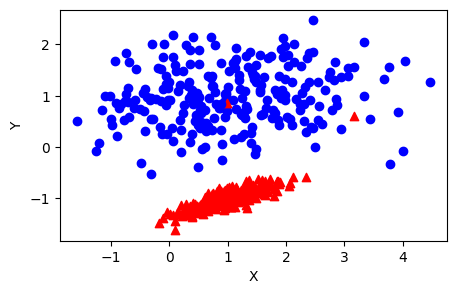

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# 显示数据集
np.random.seed(2024)
Nsamples = 500 # 样本点为500个
# 样本有2个有效特征
# 每个类的簇为1
X, Y = MC(n_samples=Nsamples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

def vis_data(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    for i in range(Nsamples):
        if Y[i]==0: # 如果是类-0样本, 红色三角形显示
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='r')
        else: # 如果是类-1样本，蓝色圆形显示
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='b')
            
    plt.show()
    
vis_data(X, Y)

In [10]:
# 数据切分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) # 训练集占80%
lr = LR()
lr.fit(X_train, y_train) # 拟合模型

# 查看训练集精确率（accuracy），logistic回归本质上是分类算法
print(lr.score(X_train, y_train))

# 查看测试集精确率
print(lr.score(X_test, y_test))

0.9825
0.99


In [11]:
# 使用交叉验证（十折）
print(cross_val_score(lr, X, Y, scoring='accuracy', cv=10))

[0.98 0.98 1.   1.   0.98 1.   0.98 1.   0.96 0.98]


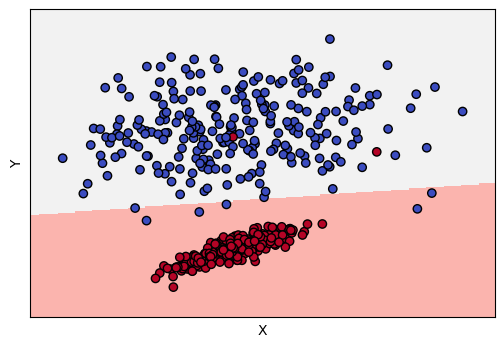

In [15]:
# 绘制分类超平面
def vis_hyper_plane(X, Y, lr):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # 划分网格
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    # 计算每个网格点上的样本LR回归值
    Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) # 转换为样本矩阵格式
    
    plt.figure(1, figsize=(6, 4))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1) # 设置颜色(底色)方案
    
    plt.scatter(X[:, 0], X[:, 1], c=np.abs(Y-1), edgecolors='k', cmap=plt.cm.coolwarm) # 点颜色
    plt.xlabel('X')
    plt.ylabel('Y')
    
    plt.xlim(xx.min(), xx.max()) # 限定坐标显示范围
    plt.ylim(yy.min(), yy.max())
    plt.xticks([]) # 坐标轴数字不显示
    plt.yticks([])
    
    
vis_hyper_plane(X, Y, lr)
    

幂迭代算法（power iteration）

In [18]:
import numpy as np
import matplotlib.pyplot as plt

AT = np.array([
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 1, 0, 1, 0],
    [1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0]
]) 

p = np.ones(5)

k = 0 # 记录迭代次数
eps = 1e-6 
lams = []

while k< 100:
    k+=1
    pnew = AT@p
    idx = np.argmax(pnew) # 最大元素的索引
    lam = pnew[idx] / p[idx] # 特征值估计
    pnew /= pnew[idx] # 缩放向量
    lams.append(lam) # 存储特征值
    
    if np.linalg.norm(pnew - p) <= eps: # 如果pnew和p的差距已经很小
        break
    else:
        p = pnew
        print('iteration {}, p is {}'.format(k, p))
        
pnew = pnew / np.linalg.norm(pnew) # 向量规范化

iteration 1, p is [0.5 1.  1.  0.5 1. ]
iteration 2, p is [0.66666667 1.         1.         0.33333333 1.        ]
iteration 3, p is [0.75 1.   1.   0.5  1.  ]
iteration 4, p is [0.66666667 1.         1.         0.5        1.        ]
iteration 5, p is [0.66666667 1.         1.         0.44444444 1.        ]
iteration 6, p is [0.69230769 1.         1.         0.46153846 1.        ]
iteration 7, p is [0.68421053 1.         1.         0.47368421 1.        ]
iteration 8, p is [0.67857143 1.         1.         0.46428571 1.        ]
iteration 9, p is [0.68292683 1.         1.         0.46341463 1.        ]
iteration 10, p is [0.68333333 1.         1.         0.46666667 1.        ]
iteration 11, p is [0.68181818 1.         1.         0.46590909 1.        ]
iteration 12, p is [0.68217054 1.         1.         0.46511628 1.        ]
iteration 13, p is [0.68253968 1.         1.         0.46560847 1.        ]
iteration 14, p is [0.68231047 1.         1.         0.46570397 1.        ]
iteration 

In [19]:
pnew

array([0.35557552, 0.52112121, 0.52112121, 0.24261929, 0.52112121])

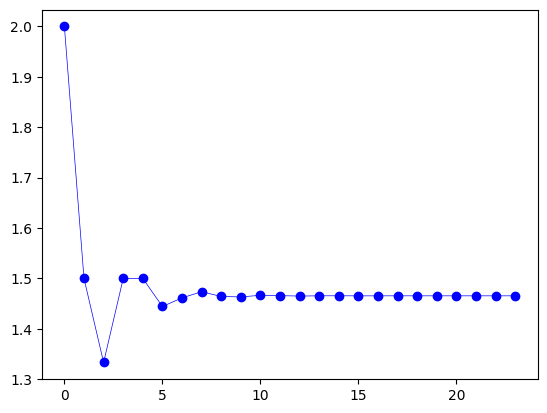

In [54]:
plt.plot(lams, 'b-o', lw=0.5)

In [55]:
lams

[2.0,
 1.5,
 1.3333333333333333,
 1.5,
 1.5,
 1.4444444444444444,
 1.4615384615384615,
 1.473684210526316,
 1.4642857142857142,
 1.4634146341463414,
 1.4666666666666668,
 1.4659090909090908,
 1.4651162790697674,
 1.4656084656084656,
 1.4657039711191335,
 1.4655172413793105,
 1.4655462184873949,
 1.4655963302752293,
 1.4655712050078247,
 1.4655632674853178,
 1.4655737704918033,
 1.4655729555058414,
 1.4655698778833108,
 1.4655711144543455]

In [16]:
M = np.array([
    [0.02, 0.02, 0.02, 0.92, 0.02],
    [0.02, 0.02, 0.47, 0.02, 0.47],
    [0.92, 0.02, 0.02, 0.02, 0.02],
    [0.02, 0.32, 0.32, 0.02, 0.32],
    [0.02, 0.92, 0.02, 0.02, 0.02]
]) 

p = np.ones(5)

k = 0 # 记录迭代次数
eps = 1e-6 
lams = []

while k< 100:
    k+=1
    pnew = M.T@p
    idx = np.argmax(pnew) # 最大元素的索引
    lam = pnew[idx] / p[idx] # 特征值估计
    pnew /= pnew[idx] # 缩放向量
    lams.append(lam) # 存储特征值
    
    if np.linalg.norm(pnew - p) <= eps: # 如果pnew和p的差距已经很小
        break
    else:
        p = pnew
        print('iteration {}, p is {}'.format(k, p))
        
pnew = pnew / np.linalg.norm(pnew) # 向量规范化

iteration 1, p is [0.76923077 1.         0.65384615 0.76923077 0.65384615]
iteration 2, p is [0.74248927 1.         0.84549356 0.8583691  0.84549356]
iteration 3, p is [0.76680917 1.         0.71842208 0.68286047 0.71842208]
iteration 4, p is [0.77952525 1.         0.78843459 0.82639339 0.78843459]
iteration 5, p is [0.76188401 1.         0.75067241 0.75418263 0.75067241]
iteration 6, p is [0.76964681 1.         0.77030819 0.77992002 0.77030819]
iteration 7, p is [0.7681241  1.         0.75890622 0.7675342  0.75890622]
iteration 8, p is [0.76843028 1.         0.76565927 0.77677355 0.76565927]
iteration 9, p is [0.76781676 1.         0.76177757 0.77030159 0.76177757]
iteration 10, p is [0.76842873 1.         0.76391001 0.77387531 0.76391001]
iteration 11, p is [0.76808882 1.         0.7627382  0.77215126 0.7627382 ]
iteration 12, p is [0.76822114 1.         0.76339936 0.77303947 0.76339936]
iteration 13, p is [0.76816523 1.         0.76301936 0.77250339 0.76301936]
iteration 14, p is [0

In [8]:
lams[-1]

1.0000003570964693

In [17]:
pnew

array([0.41957898, 0.54619426, 0.41683238, 0.42205076, 0.41683238])

权威值和hub值计算

In [20]:
import numpy as np

# 图的邻接矩阵
A = np.array([
    [0, 0, 0, 1, 0],
    [0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0],
    [0, 1, 1, 0, 1],
    [0, 1, 0, 0, 0]
])

a = np.ones(5) # 初始权威值向量

# 更新权威值
def get_h(a):
    h = A@a
    idx = np.argmax(h)
    h /= h[idx] # 缩放
    return h

# 更新hub值
def get_a(h):
    a = A.T@h
    idx = np.argmax(a)
    a /= a[idx] # 缩放
    return a

# 迭代 100 次
for i in range(100):
    h = get_h(a)
    a = get_a(h)

    print('iteration {}'.format(i))
    print('authority score vector: ', a)
    print('hub score vector: ', h)


iteration 0
authority score vector:  [0.2 0.8 1.  0.2 1. ]
hub score vector:  [0.33333333 0.66666667 0.33333333 1.         0.33333333]
iteration 1
authority score vector:  [0.04166667 0.75       1.         0.04166667 1.        ]
hub score vector:  [0.07142857 0.71428571 0.07142857 1.         0.28571429]
iteration 2
authority score vector:  [0.00877193 0.73684211 1.         0.00877193 1.        ]
hub score vector:  [0.01515152 0.72727273 0.01515152 1.         0.27272727]
iteration 3
authority score vector:  [0.00185185 0.73333333 1.         0.00185185 1.        ]
hub score vector:  [0.00320513 0.73076923 0.00320513 1.         0.26923077]
iteration 4
authority score vector:  [3.91236307e-04 7.32394366e-01 1.00000000e+00 3.91236307e-04
 1.00000000e+00]
hub score vector:  [6.77506775e-04 7.31707317e-01 6.77506775e-04 1.00000000e+00
 2.68292683e-01]
iteration 5
authority score vector:  [8.26719577e-05 7.32142857e-01 1.00000000e+00 8.26719577e-05
 1.00000000e+00]
hub score vector:  [1.431844

In [21]:
a /= np.linalg.norm(a) # 规范化

In [22]:
a # [0, 0.46, 0.63, 0, 0.63]

array([1.82237293e-68, 4.59700843e-01, 6.27963030e-01, 1.82237293e-68,
       6.27963030e-01])

In [23]:
h /= np.linalg.norm(h) # 规范化

In [24]:
h # [0, 0.58, 0, 0.79, 0.21]

array([3.96425840e-68, 5.77350269e-01, 3.96425840e-68, 7.88675135e-01,
       2.11324865e-01])